In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings

warnings.filterwarnings('ignore')

In [89]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')


base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [90]:
#dimensão
base_dados.shape

(1034, 9)

In [91]:
#nulos
base_dados.isnull().sum()
base_dados['Year'] = base_dados['Year'].fillna(0)  # Substitui NaN por 0
base_dados = base_dados[~base_dados['Year'].isin([float('inf'), float('-inf')])]  # Remove infinitos
base_dados['Year'] = base_dados['Year'].astype(int)

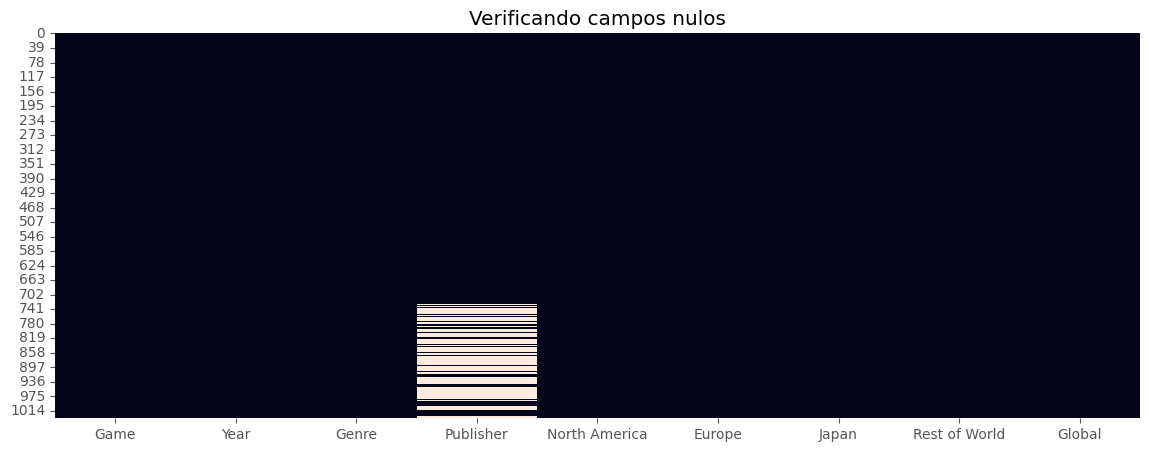

In [ ]:
#valores nulos exibindo em graficos
plt.figure(figsize=(14, 5))
plt.title('Verificando campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);
#Há valores nulos na coluna  Publisher

In [93]:
#remover os valores nulos
base_dados.dropna(inplace=True)

In [94]:
#analise estatística
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


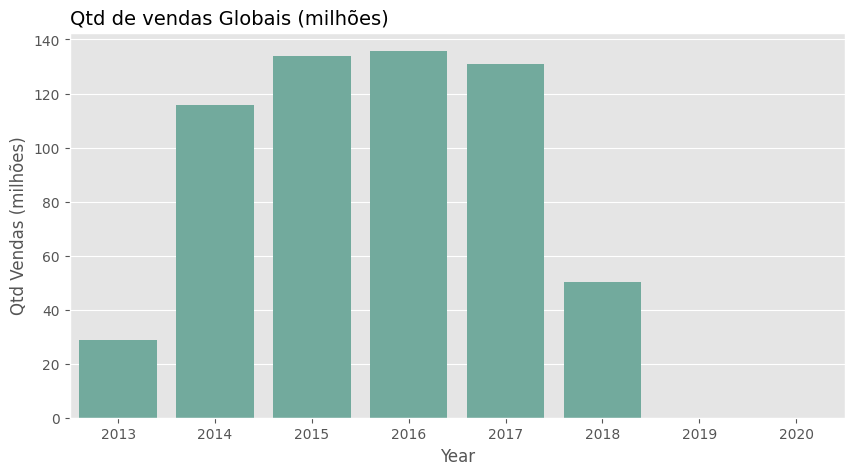

In [95]:
plt.figure(figsize=(10,5))
plt.title('Qtd de vendas Globais (milhões)', loc='left', fontsize=14)
plt.ylabel('Qtd Vendas (milhões)')
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum);
#Há uma distribuição de vendas e  picos de vendas gradativas 4 anos consecutivos e posteriormente as vendas vão caindo 
#Podendo indicar um período de crescimento seguindo por uma saturação do mercado ou algum fator externo impactou negativamente as vendas

In [96]:
#retirar os anos 2019 e 20
base_dados = base_dados.loc[ (base_dados['Year'] != 2019) & (base_dados['Year'] != 2020) ]

base_dados.head()
#vamos tirar os anos 2019 e 20, pois não registros de vendas nestes períodos

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


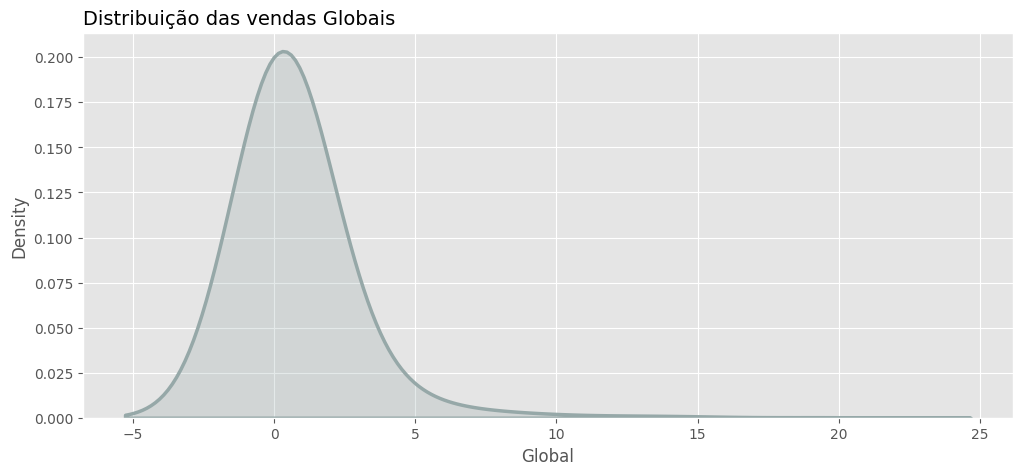

In [97]:
plt.figure(figsize=(12, 5))
plt.style.use('ggplot')
plt.title('Distribuição das vendas Globais', loc='left', fontsize=14)
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);
#o pico ocorre próximo de zero, indica que a maioria das vendas globais se concentra em torno deste valor
#isso pode sugerir que há muitos produtos com vendas baixas e pouco produto com vendas muito altas
#logicamente poucos lançamentos de jogos tiveram resultados significativos em suas vendas

In [106]:
analise = base_dados.groupby( by=['Year'] ).sum(numeric_only=True).reset_index()

analise.head()

,Year,North America,Europe,Japan,Rest of World,Global
0,2013,10.35,12.88,0.97,4.57,28.76
1,2014,39.80,54.12,3.58,18.29,115.85
2,2015,49.60,56.21,7.28,20.88,133.99
3,2016,47.40,57.98,9.65,20.71,135.72
4,2017,44.77,57.18,9.08,19.89,130.90


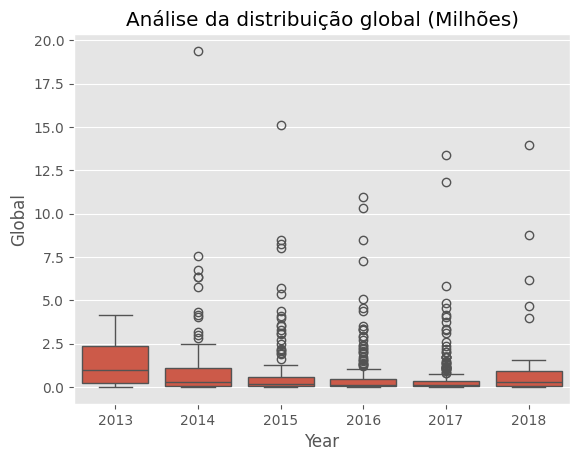

In [99]:
plt.title('Análise da distribuição global (Milhões)')

sns.boxplot(data=base_dados, x='Year', y='Global');

#Há jogos de games vendidos em "Global" que obtiveram outliers discrepantas tendo destaque positvos em relação com a
# distribuição de dados dos demais, em 2014 há produto vendendo mais de 19 milhões em jogos
#Ou seja, há jogos específicos que vendem muito mais que o outros
#Possivelmente em 2014 houve o lançamento do jogo: GTA V resultando outliers milhionarios resultando em quase 20 milhoes em vendas

In [100]:
base_dados.loc[base_dados['Global'] >= 10]
#em 2014 o jogo GTA V de acordo com os dados fornecidos é o jogo mais vendido até o momento chegando quase nos seus 20 milhões em vendas
# em segundo lugar fica o jogo do gênero "Shooter" Call of Duty atingindo 15.09 milhões em vendas em 2015

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [186]:
#Analisando a proporção dos 100% de cada continente comparado ao total
America = [round(america / total * 100) for america, total in zip(analise['North America'], analise['Global'])]
Europa = [round(europa/total * 100)for europa, total in zip(analise['Europe'], analise['Global'])]
Japao = [round(japan /total * 100) for japan , total in zip(analise['Japan'], analise['Global'])]
Resto_do_Mundo = [round(mundo /total * 100) for mundo, total in zip(analise['Rest of World'], analise['Global'])]


America, Europa, Japao, Resto_do_Mundo

#a primeira lista de tuplas é a América do norte, ou seja: os 35.98% é a proporção de venda da america do norte de 2013 em comparação com a venda total geral de totos os continentes
#em 2014 a américa do norte representaram  34.35% de vendas em comparação com a venda geral do mundo
#cada lista de tuplas representa um continente de 2013 até 2018 demonstrando a representatividade de vendas em porcentagem em comparação com o resto do mundo 

([36, 34, 37, 35, 34, 39],
 [45, 47, 42, 43, 44, 37],
 [3, 3, 5, 7, 7, 8],
 [16, 16, 16, 15, 15, 15])

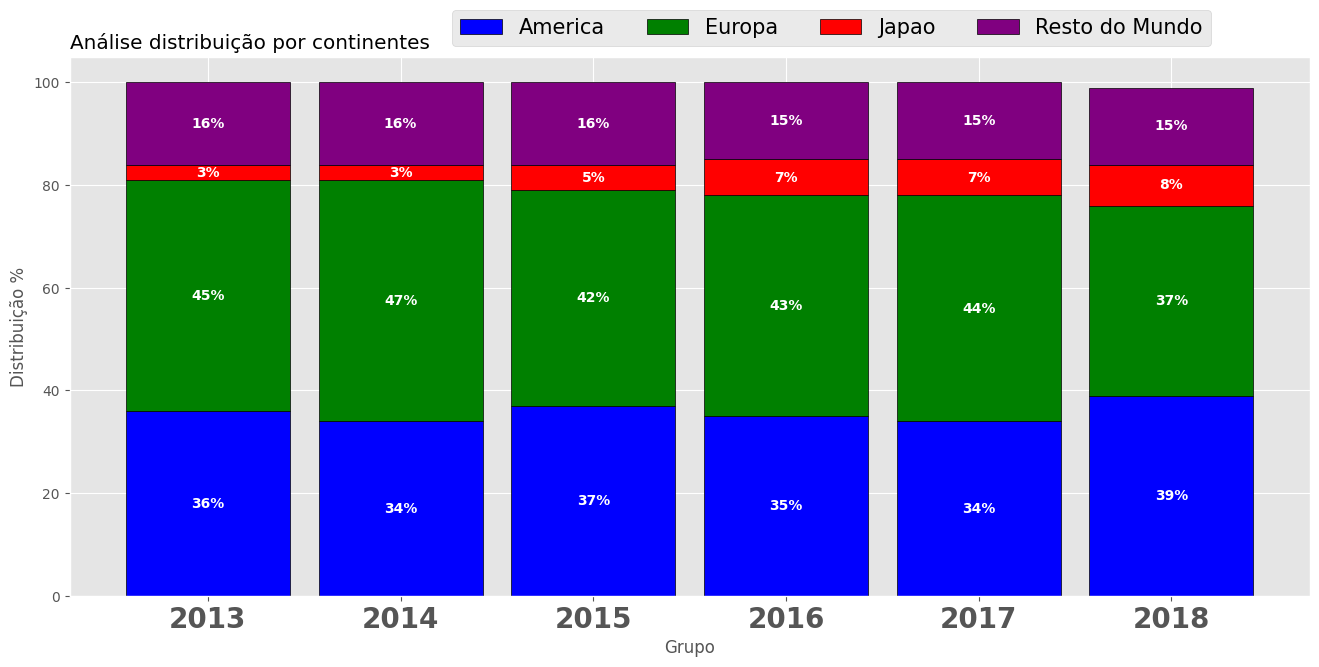

In [ ]:
plt.figure(figsize=(16,7))
plt.title('Análise distribuição por continentes', loc='left')
largura_barra = 0.85
Rotulos = analise['Year']
grupos = [0,1,2,3,4,5]
plt.xticks(grupos, Rotulos, fontweight='bold', fontsize=20)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend()


plt.bar(grupos, America, width=largura_barra, color='blue', edgecolor='black', label='America');

plt.bar(grupos, Europa, bottom=America, width=largura_barra, color='green', edgecolor='black', label='Europa');

plt.bar( grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=largura_barra, color='red', edgecolor='black', label='Japao');

plt.bar( grupos, Resto_do_Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=largura_barra, color='purple', edgecolor='black', label='Resto do Mundo');

for i in range(len(grupos)):
    
    plt.text(grupos[i], America[i]/2, f"{America[i]}%", ha='center', va='center', color='white', fontweight='bold')
   
    plt.text(grupos[i], America[i] + Europa[i]/2, f"{Europa[i]}%", ha='center', va='center', color='white', fontweight='bold')
   
    plt.text(grupos[i], America[i] + Europa[i] + Japao[i]/2, f"{Japao[i]}%", ha='center', va='center', color='white', fontweight='bold')
    
    plt.text(grupos[i], America[i] + Europa[i] + Japao[i] + Resto_do_Mundo[i]/2, f"{Resto_do_Mundo[i]}%", ha='center', va='center', color='white', fontweight='bold')

plt.legend(bbox_to_anchor=(0.3, 1), ncol=4, fontsize=15);

plt.show()


In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.preprocessing import LabelEncoder

funcao_label = LabelEncoder()

base_dados['Produtor'] = funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = funcao_label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = funcao_label.fit_transform(base_dados['Game'])

base_dados.head()

#estou atribuindo dados categoricos com  números 

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [200]:
#definindo as peletas de cores para o proximo gráfico

paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.96038885399407, 0.3814317878772117, 0.8683117650835491)]

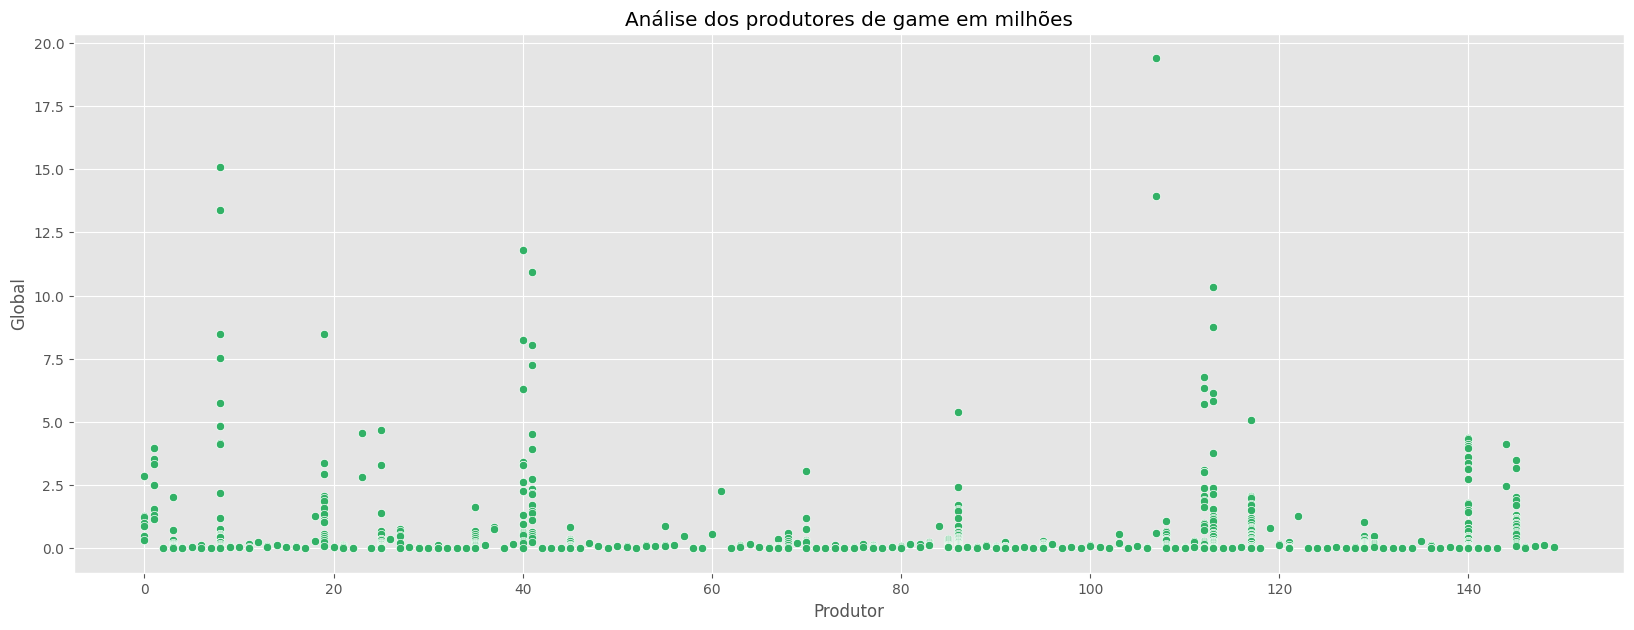

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Análise dos produtores de game em milhões')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[3]);


#O produtor 107(Rockstar Games) aparece como a desenvolvedora que mais vendeu com apenas um jogo
# A Activision produtor 8 teve uma distribuição consideravel de altas vendas em mais de um jogo 

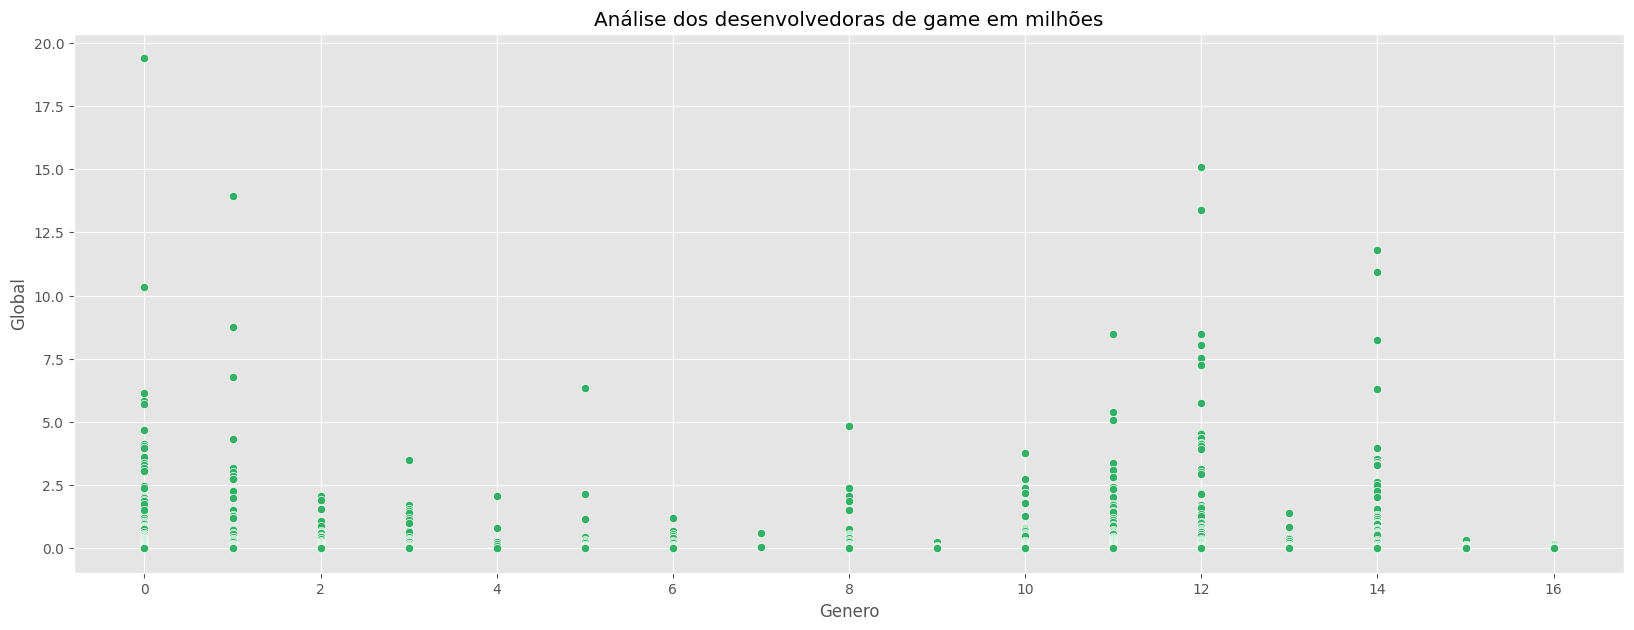

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Análise dos desenvolvedoras de game em milhões')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[3]);
#O genero Action  teve um destaque consideravel de vendas 
#O genero shooter está em segundo lugar de destaque
#E em terceiro lugar o genero Action-Adventure 

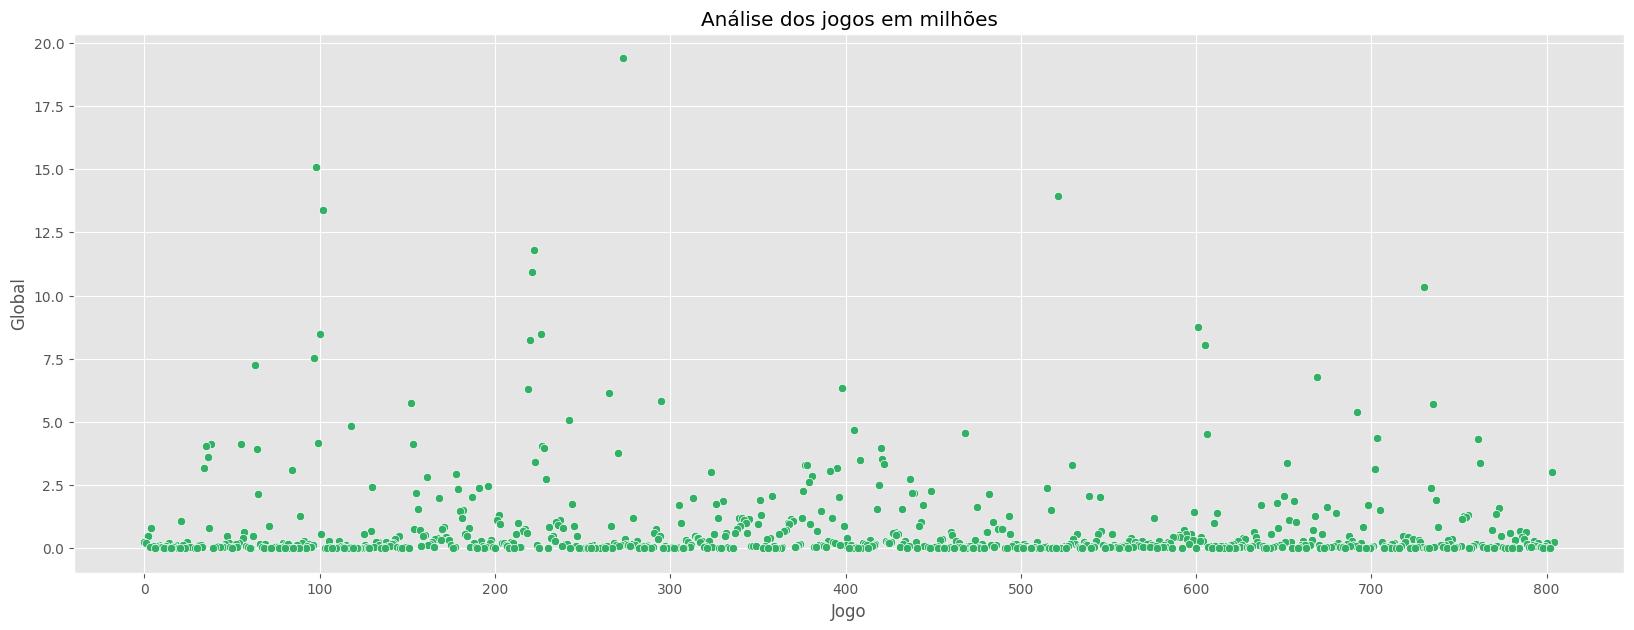

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Análise dos jogos em milhões')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[3]);
#há uma concentração grande de jogos que não alcançaram mais de 1 milhão em vendas 
#poucos jogos de fato superam mais de 10 milhões em vendas 
